## **IMPORTO LOS DATOS CSV**  <<<<<<



In [ ]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string

df = pd.read_csv('final.csv')
df.head(3)


,content
0,"We visited it on the night tour, kindness and..."
1,It is a pre-Columbian archaeological site nea...
2,On a guided tour you will learn many interest...


## **CREO FILTROS PARA LIMPIAR DATOS**  <<<<<<

In [ ]:
def clean_text(text):
  text = re.sub(r'%', '',text)
  text = re.sub(r'•', '',text)
  text = re.sub('años', '',text)
  text = re.sub('d. C', '',text)
  return text


## **ALMACENO LOS CAMBIOS EN NUEVA VARIABLE**  <<<<<<

In [ ]:
df['clean_text'] = df['content'].apply(clean_text)
df['clean_text']

0       We visited it on the night tour, kindness and...
1       It is a pre-Columbian archaeological site nea...
2       On a guided tour you will learn many interest...
3      Very interesting archaeological site with a lo...
4       The ticket costs 15 soles and you can do it d...
                             ...                        
178     It is essential to visit an archaeological si...
179     Incredible to find these ruins in Madero de l...
180     The best part is the comfort. Right in the ce...
181    Very surprised to discover this brick pyramid ...
182     Impressive how this archaeological site was d...
Name: clean_text, Length: 183, dtype: object

In [ ]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
    result = analysis.sentiment.polarity
    return result

In [ ]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [ ]:
df['polarity'].head(3)

0    0.433333
1    0.166667
2    0.380000
Name: polarity, dtype: float64

## **AGREGO NUEVA COLUMNA PARA LOS RESULTADOS DE SENTIMIENTOS (POLARITY)**  <<<<<<

In [ ]:
df.head(3)

,content,clean_text,polarity
0,"We visited it on the night tour, kindness and...","We visited it on the night tour, kindness and...",0.433333
1,It is a pre-Columbian archaeological site nea...,It is a pre-Columbian archaeological site nea...,0.166667
2,On a guided tour you will learn many interest...,On a guided tour you will learn many interest...,0.380000


In [ ]:
df[df.polarity < 0.3]['polarity'].head()

1    0.166667
3    0.141667
4    0.163393
5    0.025000
6    0.226531
Name: polarity, dtype: float64

## **LES AGREGO UN RANGO: 1 = POSITIVO, -1 = NEGATIVO, 0 = NEUTRO**  <<<<<<

In [ ]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [ ]:
df['result'] = df['polarity'].apply(x_range)

In [71]:
df
df.to_csv('resultados.csv')

In [ ]:
df['result'].value_counts()

 1    166
-1     11
 0      6
Name: result, dtype: int64

## **GRAFICO ESTADÍSTICO PARA LAS 3 VARIABLES**  <<<<<<

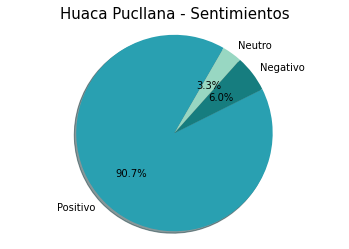

In [69]:
import matplotlib.pyplot as plt
labels = 'Positivo', 'Negativo', 'Neutro'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['result'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 60)
plt.title('Huaca Pucllana - Sentimientos', fontsize = 15)
plt.axis('equal')
plt.show()

## **NUBE DE PALABRAS**  <<<<<<

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df.clean_text)
text

' We visited it on the night tour, kindness and patience of the guide. Easy to get to and 1000 recommended.  It is a pre-Columbian archaeological site near the district of Miraflores. Here you can enjoy a guided tour through the adobe constructions dating from 200 to 900 AD  On a guided tour you will learn many interesting facts about the people who built the Inca pyramid or tomb and their civilization. It gives you a real sense of history. It is located in the district of Miraflores and at the top you can see part of the modern city. Very interesting archaeological site with a lot of history to tell. The visit is guided and the guide explained everything very well in Spanish. We loved the visit. We simply did not expect that we would be left with very dusty pants and shoes! But the guided tour is worth it!  The ticket costs 15 soles and you can do it directly at the entrance. Peruvians, on the other hand, do not pay! There are free guides that welcome groups of 10 people (English and 

In [ ]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)

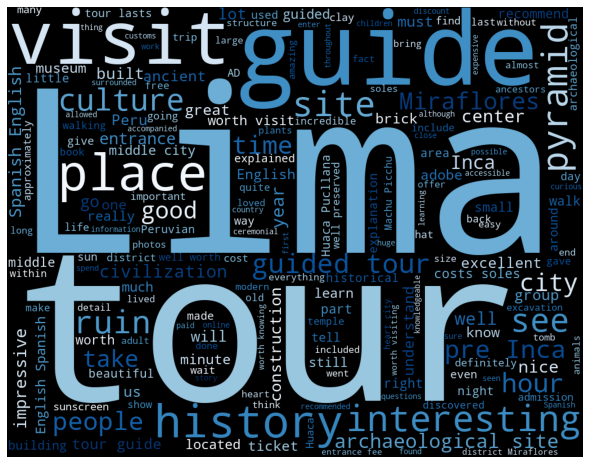

In [67]:
plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## **LAS PALABRAS MAS REPRESENTATIVAS DEL ANÁLISIS**  <<<<<<